# **Car Damage Assessment**

Create an object detection and classification model using Tensorflow that determines
the region and severity of the damage looking at the damaged car image. Train the object detection model to localize the damage, and a classification model to classify the type of damage.
Severity can vary from: low, medium and high.
1. Utilize Transfer learning to train the model faster.
2. Use data augmentation techniques to improve the performance of the model.
3. Keep the latency of the model (forward pass) less than 150ms (for Object
detection) and 50ms (for image classification) on the GPU provided on Colab
(Nvidia T4)


## **Object Detection Model**


**Part 1: Check GPU Information and Install Necessary Libraries**

In [ ]:
!nvidia-smi

Fri Apr 12 06:25:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              32W /  70W |   8363MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
"""
Install the Ultralytics library for object detection.
"""
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.5/78.2 GB disk)


In [ ]:
"""
Import necessary libraries for object detection.
"""
from ultralytics import YOLO

from IPython.display import display, Image

**Part 2: Set up Directory and Download Dataset**

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="PjORMJRNZP5v7iUeklJr")
project = rf.workspace("akash-o5v0q").project("car-damage-detection-lcxpo")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Damage-Detection-1 in yolov8:: 100%|██████████| 4044/4044 [00:00<00:00, 5155.41it/s]


**Part 3: Train Object Detection Model and Display Outputs**

In [ ]:
"""
Train the object detection model using YOLOv8.
"""
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Car-Damage-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

In [ ]:
"""
Display the outputs of the trained object detection model.
"""
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1712899495.95e9a28255d1.1868.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1560.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1561.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1562.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


**Part 4: Display Confusion Matrix, Results, and Predictions**

/content


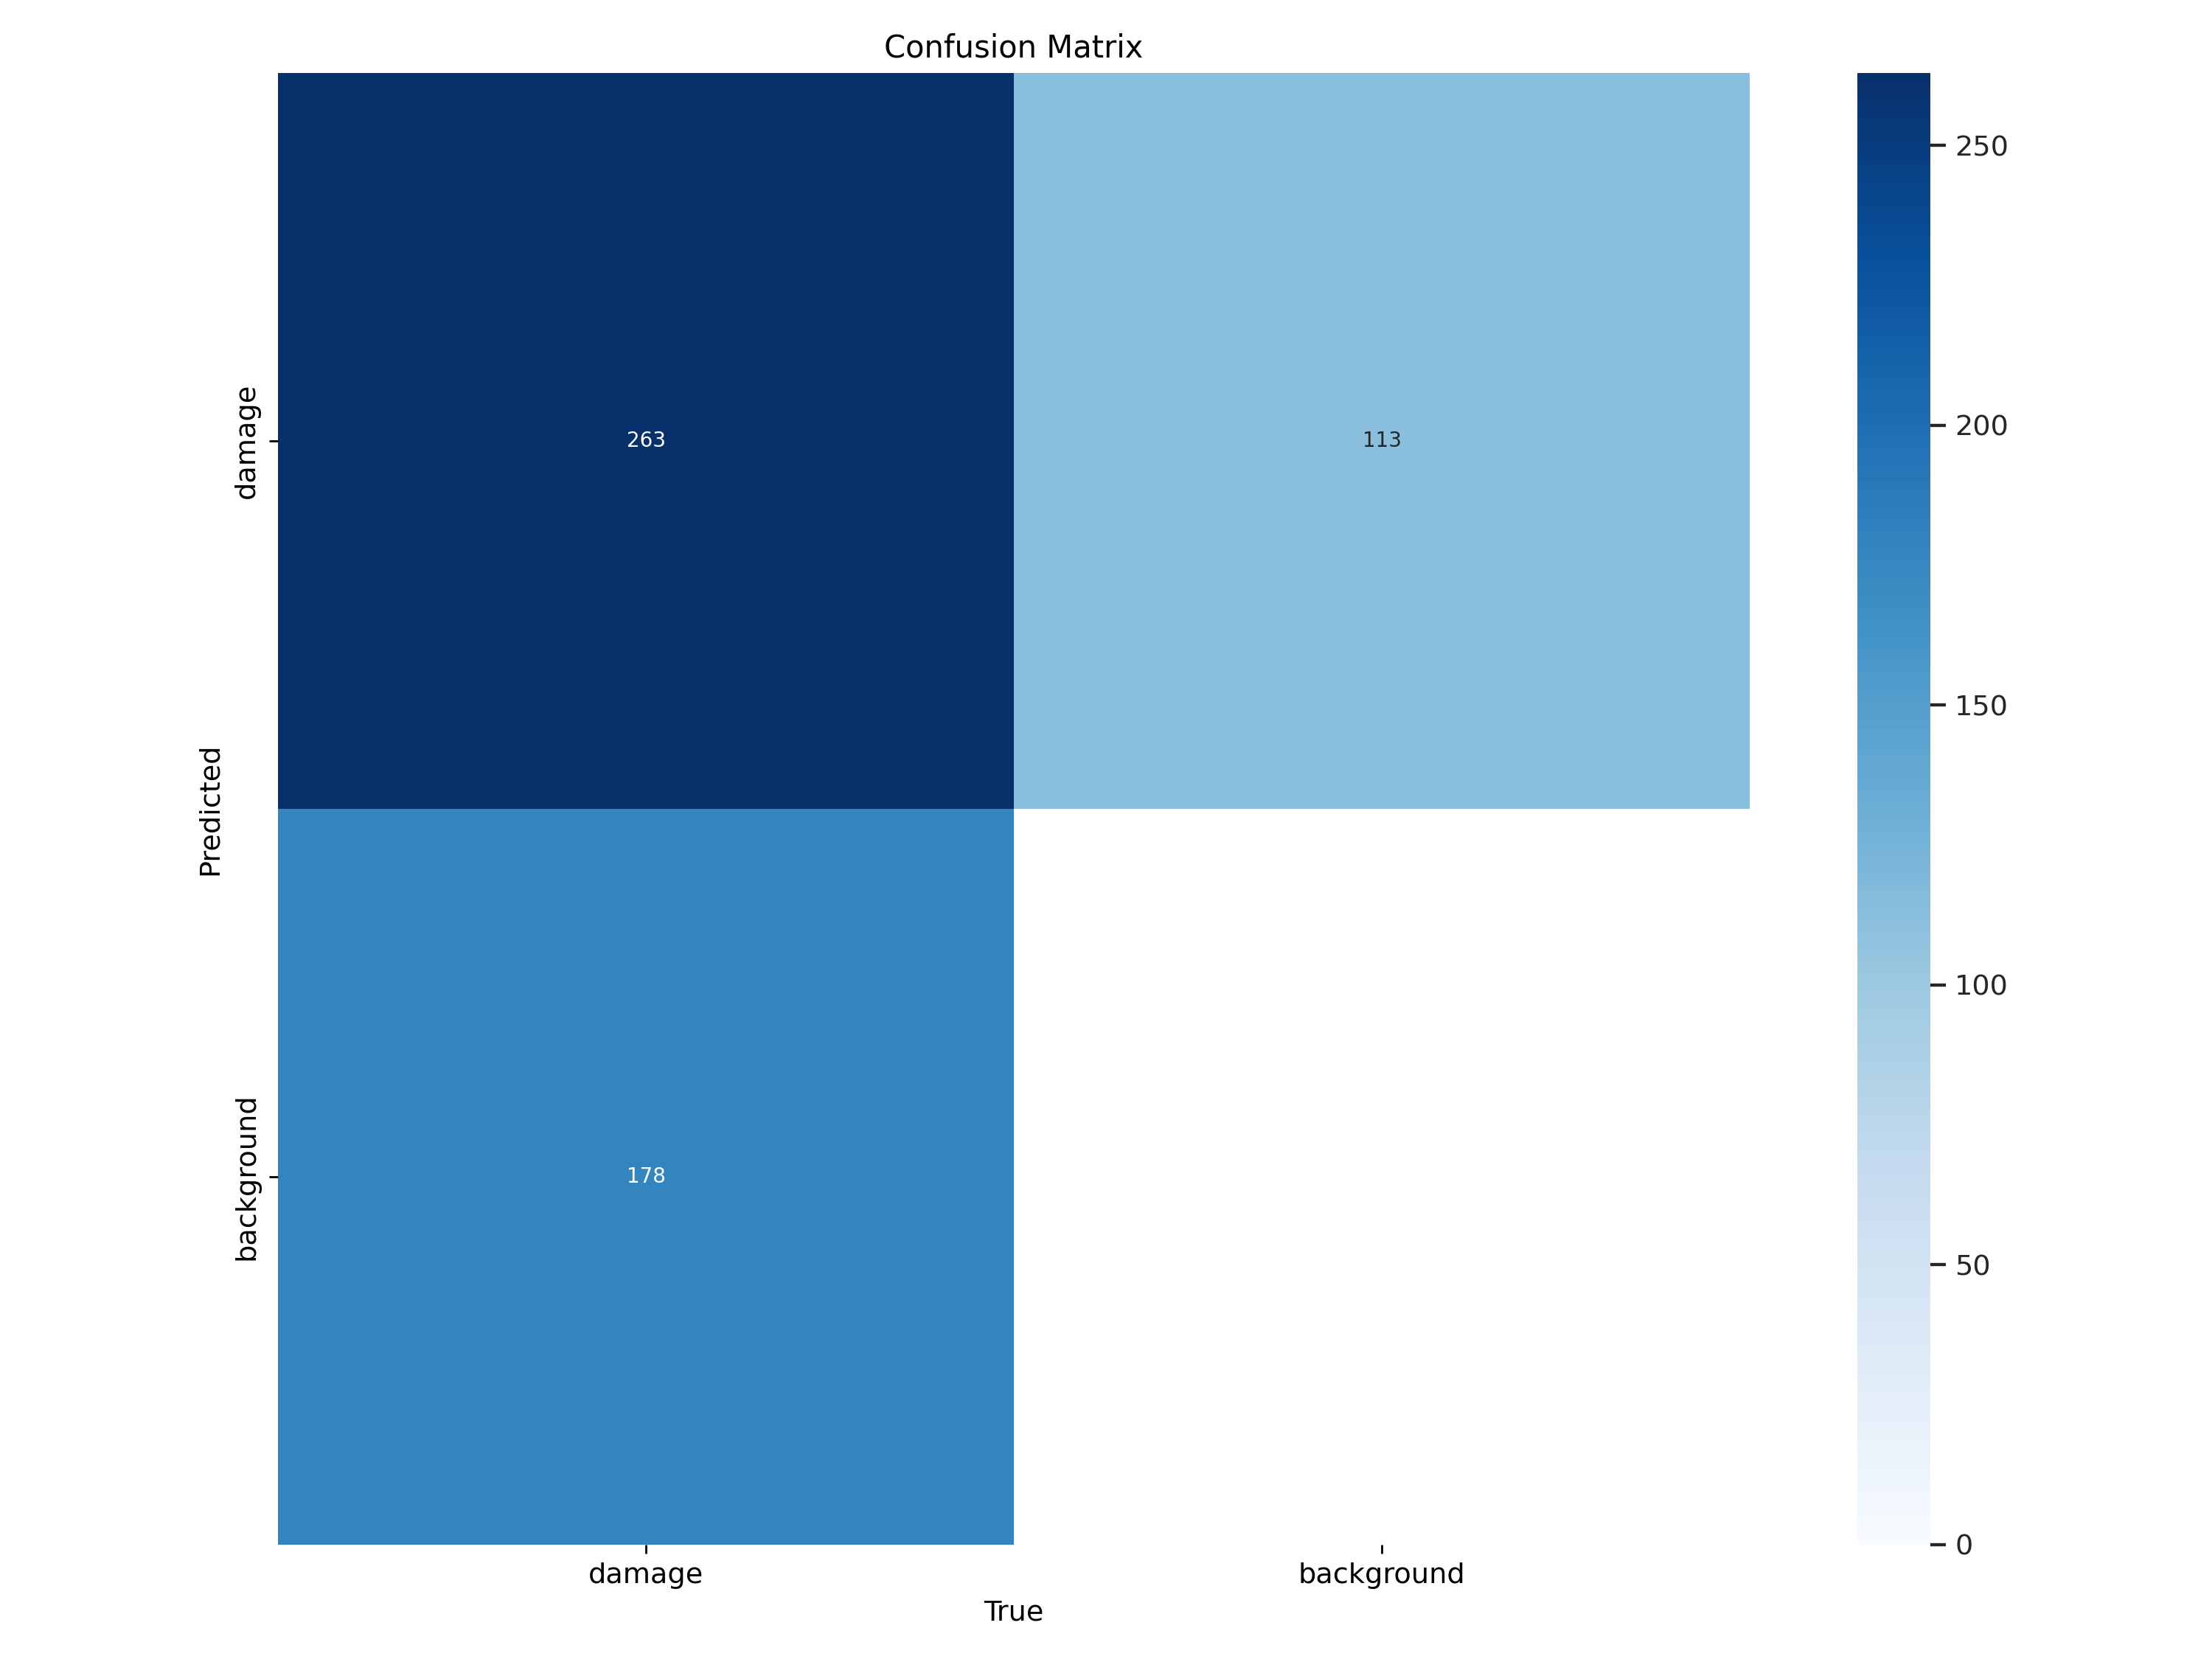

In [ ]:
"""
Display the confusion matrix of the trained model.
"""
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


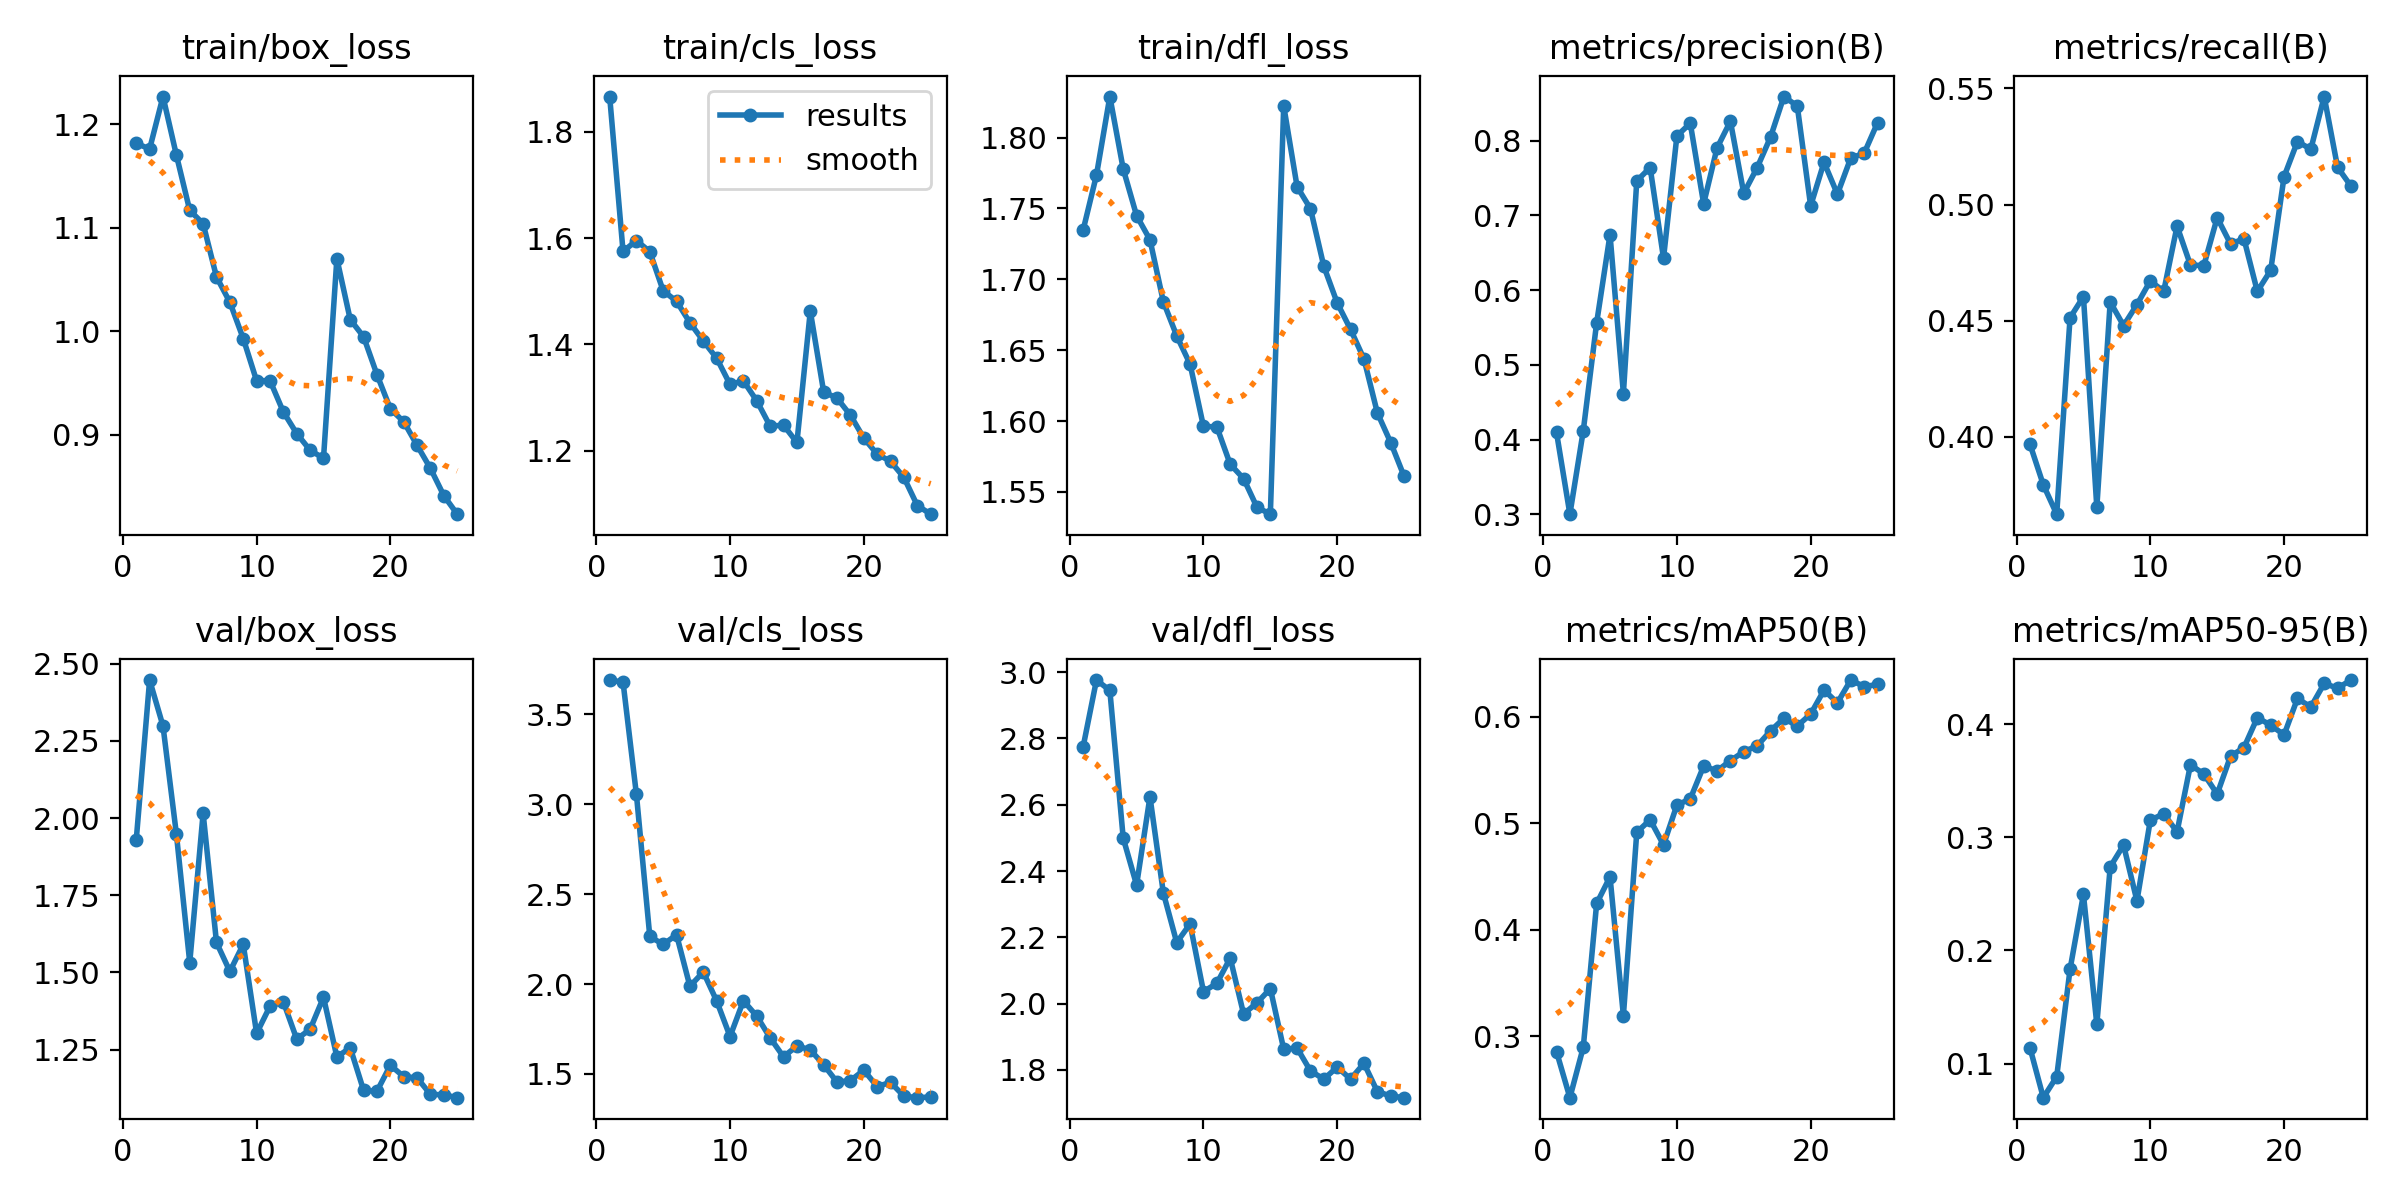

In [ ]:
"""
Display the results of the trained model.
"""
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


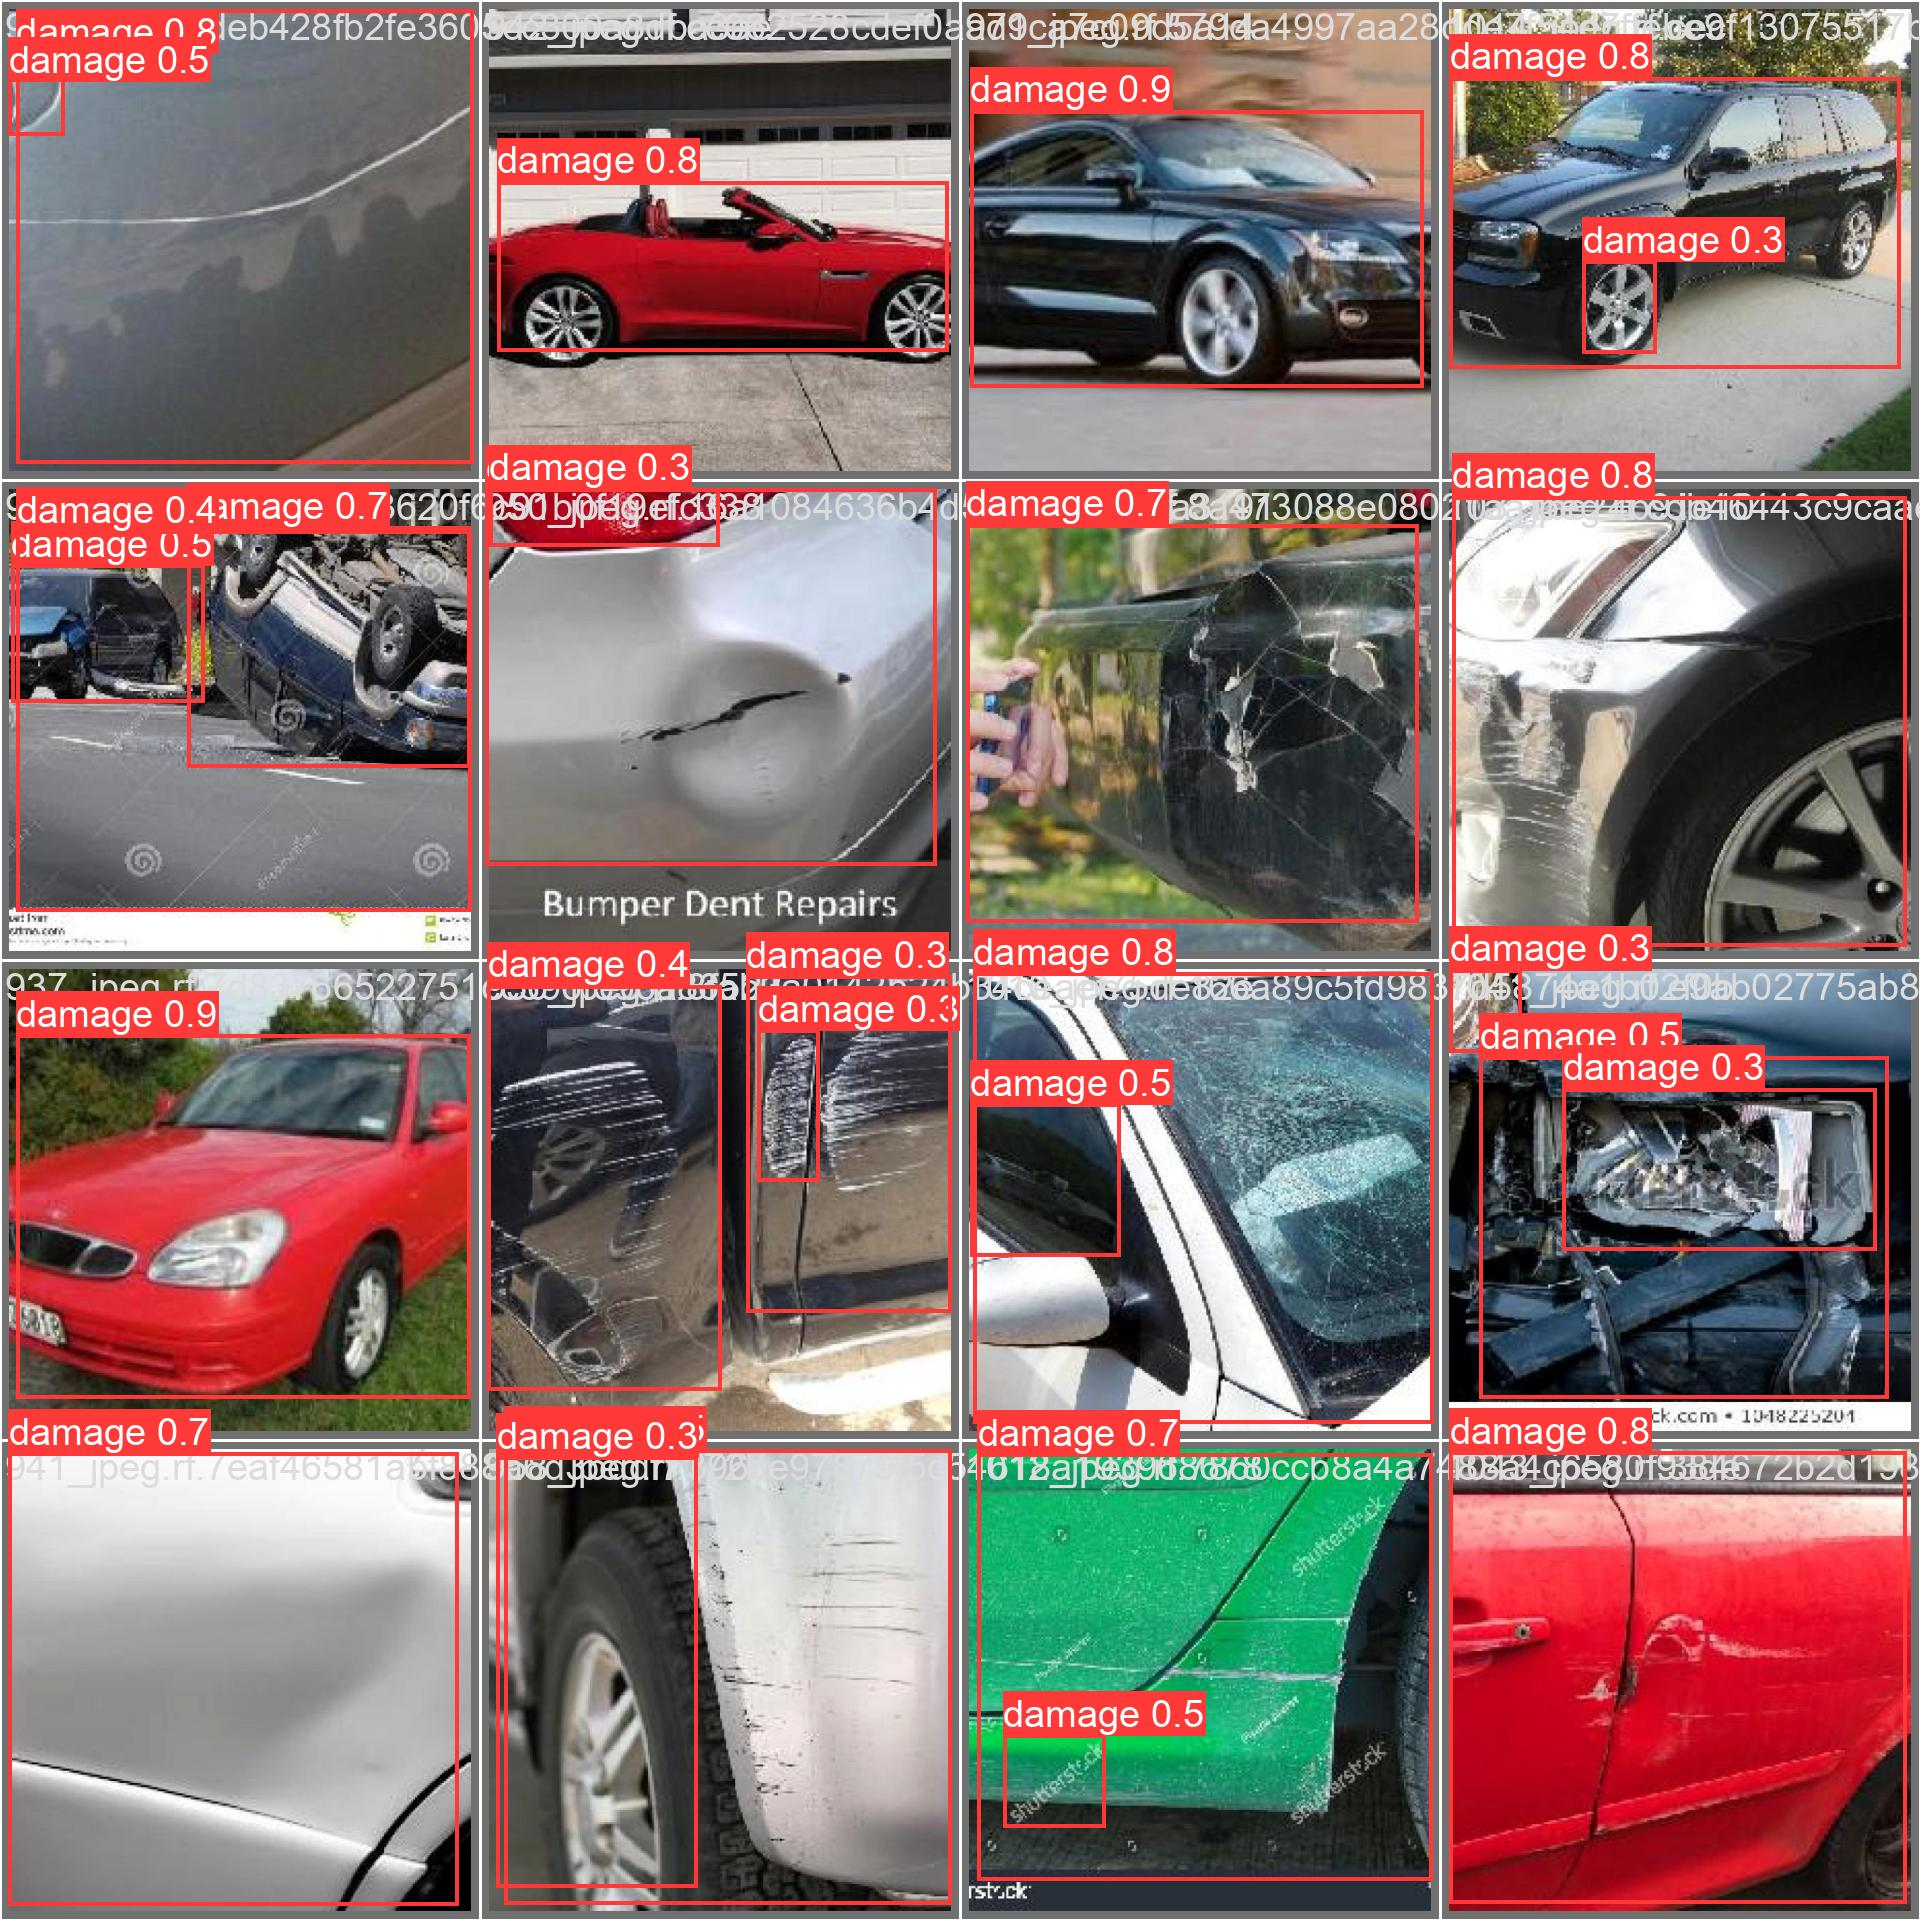

In [ ]:
"""
Display the predictions of the trained model.
"""
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=400)

**Part 5: Validate the model on the test data**

In [ ]:
"""
Validate the model on the test data.
"""
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Car-Damage-Detection-1/valid/labels.cache... 237 images, 1 backgrounds, 0 corrupt: 100% 237/237 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:07<00:00,  1.96it/s]
                   all        237        441     

In [ ]:
"""
Perform inference on the test data using the trained model.
"""
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/119 /content/datasets/Car-Damage-Detection-1/test/images/1023_jpeg.rf.b23f8cb66c958fe108b02fe57d861f86.jpg: 800x800 1 damage, 24.3ms
image 2/119 /content/datasets/Car-Damage-Detection-1/test/images/1029_jpeg.rf.6d3770760a31ca25981ac5d8bc5eae44.jpg: 800x800 2 damages, 22.6ms
image 3/119 /content/datasets/Car-Damage-Detection-1/test/images/1034_jpeg.rf.38a3df1fab94b8a0aa7a72d39cccffc0.jpg: 800x800 2 damages, 22.5ms
image 4/119 /content/datasets/Car-Damage-Detection-1/test/images/1036_jpeg.rf.accc48b6a8d3a9a0001266369dd03c2a.jpg: 800x800 2 damages, 22.5ms
image 5/119 /content/datasets/Car-Damage-Detection-1/test/images/1070_jpeg.rf.f87144537a3225b14531c1e40cb392fa.jpg: 800x800 1 damage, 23.6ms
image 6/119 /content/datasets/Car-Damage-Detection-1/test/images/1083_j

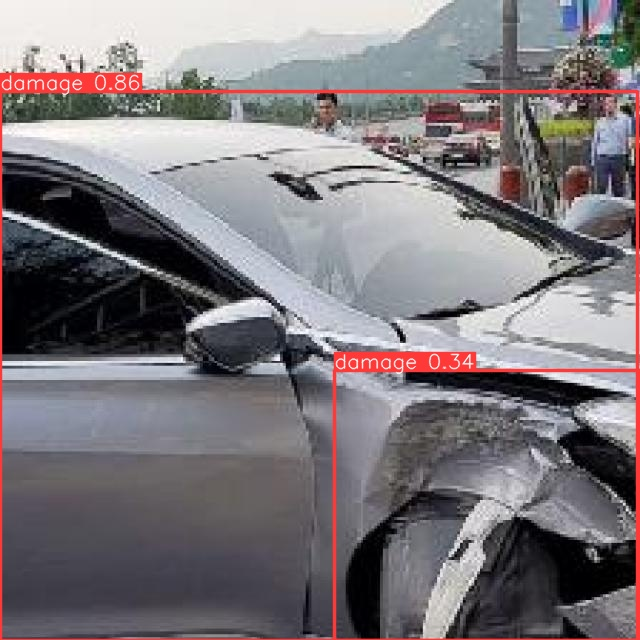

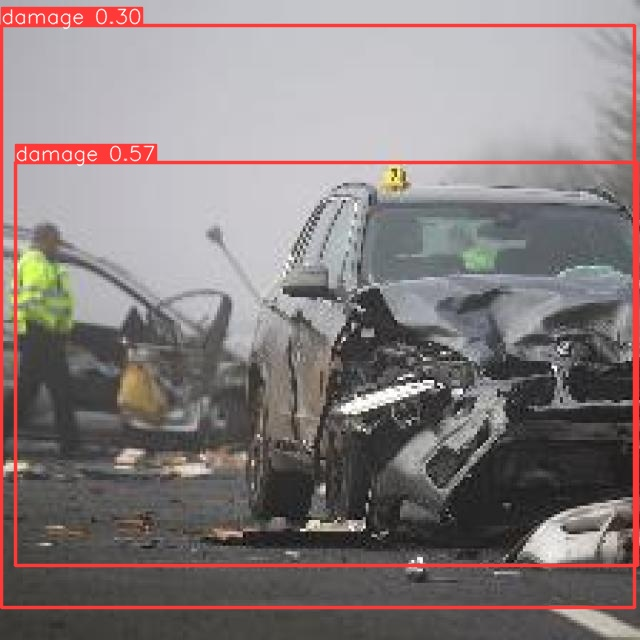

In [ ]:
"""
Display a random sample of predictions made by the model.
"""
import glob
import random
from IPython.display import Image, display

# Get a list of all JPEG files in the directory
image_paths = glob.glob(f'{HOME}/runs/detect/predict/*.jpg')

# Shuffle the list to get random images each time
random.shuffle(image_paths)

# Display a random selection of images
num_images_to_display = 2
for image_path in image_paths[:num_images_to_display]:
    display(Image(filename=image_path, width=400))
    print("\n")


### **Conclusion for obeject detection model:**

Successfully created a car damage detection model

Used data augmentation techniques to improve the performance of the model

Latency time is 28.4ms

## **Classisfication Model**

In [ ]:
import os
import cv2

detected_images_dir = "/content/runs/detect/predict"
detected_images = []

for filename in os.listdir(detected_images_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(detected_images_dir, filename)
        detected_images.append(cv2.imread(image_path))


In [ ]:
import numpy as np

# Preprocess images (resize, normalize, etc.)
processed_images = []

for image in detected_images:
    # Resize image to fit classification model input size
    resized_image = cv2.resize(image, (224, 224))
    # Normalize pixel values
    normalized_image = resized_image / 255.0
    processed_images.append(normalized_image)

processed_images = np.array(processed_images)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 model (excluding the top fully connected layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of the MobileNetV2 model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained MobileNetV2 base
classification_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 classes for severity: low, medium, high
])

# Compile the model
classification_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
classification_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 2915395 (11.12 MB)
Trainable params: 657

In [ ]:
# Perform classification
damage_severity_predictions = classification_model.predict(processed_images)


4/4 [==============================] - 1s 39ms/step


In [ ]:
severity_levels = ["Low", "Medium", "High"]

for i, prediction in enumerate(damage_severity_predictions):
    severity_index = np.argmax(prediction)
    severity_level = severity_levels[severity_index]
    print(f"Region {i+1}: Severity Level - {severity_level}")


NameError: name 'damage_severity_predictions' is not defined

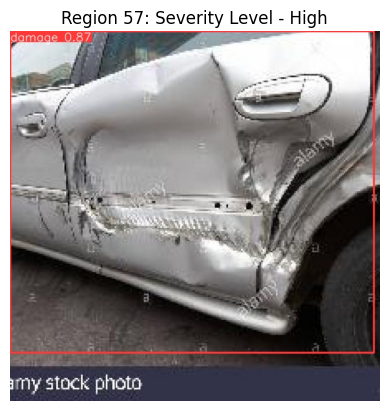

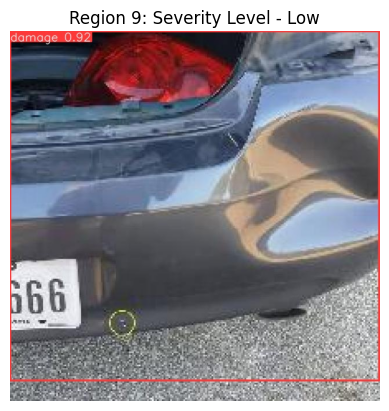

In [ ]:
import random
import matplotlib.pyplot as plt


# Select a random subset of images to visualize
num_images_to_visualize = 2
random_indices = random.sample(range(len(detected_images)), num_images_to_visualize)

# Visualize the selected images with severity predictions
for i in random_indices:
    image = detected_images[i]
    severity_index = np.argmax(damage_severity_predictions[i])
    severity_level = severity_levels[severity_index]

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Region {i+1}: Severity Level - {severity_level}")
    plt.axis("off")
    plt.show()


## **Conclusion:**
Created an object detection and classification model that determines the region and severity of the damage looking at the damaged car image.

Trained the object detection model to localize the damage, and a classification model to classify the type of damage. Severity can vary from: low, medium and high.

Utilized Transfer learning to train the model faster.

Used data augmentation techniques to improve the performance of the model.

Latency time of object detection model is 28.4ms and 39ms for classification model